In [70]:
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pickle as pkl
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras import activations
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tf_keras_vis.gradcam import Gradcam
import matplotlib.pyplot as plt


In [71]:
class_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/2DCNN_Training_Benchmark_2DTimesweeper_Class_aft")
sdn_reg_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/REG_2DCNN_Training_Benchmark_sdn_minmax_2DTimesweeper_Reg_aft")
ssv_reg_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/REG_2DCNN_Training_Benchmark_ssv_minmax_2DTimesweeper_Reg_aft")

In [72]:
test_data = pkl.load(open('/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/testing_data.pkl', 'rb'))

In [73]:
neut = test_data["neut"]["0"]["aft"]
sdn = test_data["sdn"]["0"]["aft"]
ssv = test_data["ssv"]["0"]["aft"]

X = preprocess_input(np.asarray([neut, ssv, sdn]))
X = np.expand_dims(X, -1)

In [74]:
X.shape

(3, 20, 51, 1)

In [75]:
replace2linear = ReplaceToLinear()
score = CategoricalScore([0, 1, 2])

In [76]:
saliency = Saliency(class_model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.2)

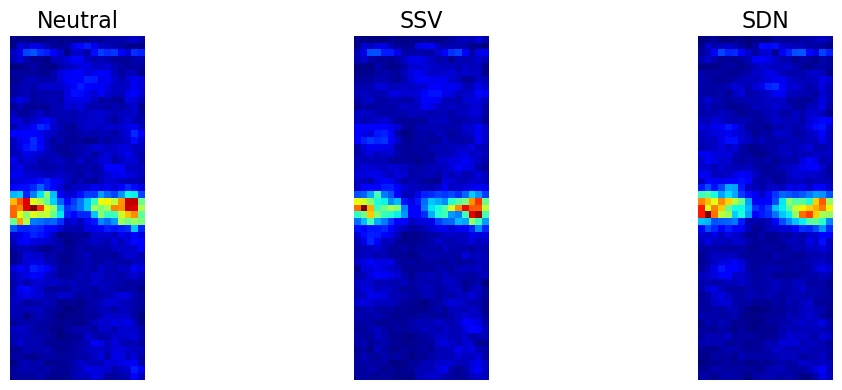

In [77]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(["Neutral", "SSV", "SDN"]):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i].T, cmap='jet')
    ax[i].axis('off')
    ax[i].set_yticks([25])
    ax[i].set_yticklabels(["25"])
    
plt.yticks([25])
plt.tight_layout()
plt.show()

In [78]:
class_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/2DCNN_Training_Benchmark_2DTimesweeper_Class_hft")
sdn_reg_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/REG_2DCNN_Training_Benchmark_sdn_minmax_2DTimesweeper_Reg_hft")
ssv_reg_model = load_model("/work/users/l/s/lswhiteh/timesweeper-experiments/simple_sims/better_benchmark/train_benchmark/trained_models/REG_2DCNN_Training_Benchmark_ssv_minmax_2DTimesweeper_Reg_hft")


In [79]:
neut = test_data["neut"]["0"]["hft"]
sdn = test_data["sdn"]["0"]["hft"]
ssv = test_data["ssv"]["0"]["hft"]

X = preprocess_input(np.asarray([neut, ssv, sdn]))
X = np.expand_dims(X, -1)

saliency = Saliency(class_model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.2)


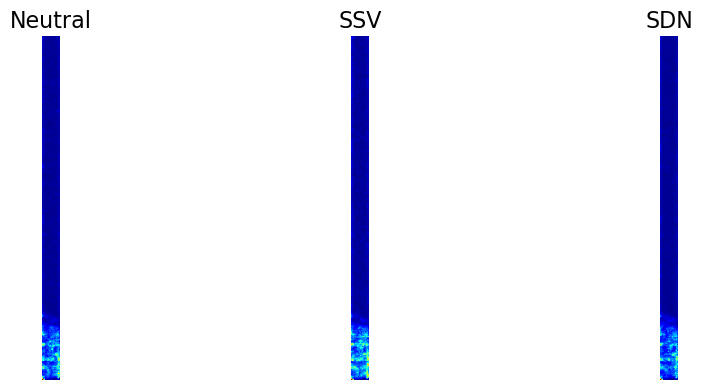

In [80]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(["Neutral", "SSV", "SDN"]):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(saliency_map[i].T[::-1], cmap='jet')
    ax[i].axis('off')

plt.yticks([0, 100], ["0", "100"])
plt.tight_layout()
plt.show()

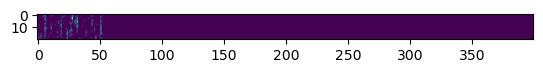

In [81]:
plt.imshow(sdn)
